In [6]:
num_classes = 10 

# input image dimensions
img_rows, img_cols = 28, 28

In [7]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

input data에 존재하는 하나의 이미지의 shape을 변경해줘야 한다. (28x28) => (28x28x1)<br>
위의 코드는 keras에서 사용하는 방식에 따라서 channel의 수가 먼저 나올 수도 있고, 나중에 나올 수도 있는데 그를 확인하고 그에 맞게 input image의 형태를 변경하는 것이다.

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
x_train = x_train.astype('float32')/255 # 0 ~ 1 사이의 값으로 normalization 하기
x_test = x_test.astype('float32')/255

In [13]:
y_train[0]

5

In [14]:
from tensorflow.keras.utils import to_categorical 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [15]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# 여기서 2D는 필터가 가로/세로 양방향으로 움직인다는 것을 의미

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# strides=(1, 1), padding='valid'(패딩을 하지 않는다는 의미) 기본값

padding = 'same' 인 경우, 출력되는 activation map의 크기를 입력된 데이터의 크기와 동일하게 함

In [15]:
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape, strides=(2,2), padding="same")) 

Conv2D에 대한 자세한 내용은 https://keras.io/layers/convolutional/ 참조 
또는 https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [19]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# strides의 기본값 => pool_size

2x2 크기의 filter를 사용해서 Max pooling 수행

In [20]:
model.add(Flatten())

Flatten()은 3차원 형태의 데이터를 1차원 형태로 변경하는 작업을 수행

In [21]:
model.add(Dense(128, activation='relu'))

In [22]:
model.add(Dense(10, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [1]:
# 13*13*32 = 5408
# (5408+1)*128 = 692352

In [20]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, strides=(2,2), padding="valid")) 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, strides=(2,2), padding="same")) 
model2.summary()
# strides 가 (1,1)이 아닌 경우, padding="same" 은 filter를 적용할 때
# 짤리는 부분이 없도록 가장자리를 채워주는 방식이라고 생각할 수 있다. 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [19]:
keras.utils.plot_model(model)
# pip install pydot
# pip install pydotplus
# pip install graphviz

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [20]:
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [25]:
import time
start_time = time.time()
history = model.fit(x_train, y_train_one_hot, epochs=5, batch_size=128, validation_split=0.2)
print(round(time.time() - start_time, 2))

Epoch 1/5
375/375 [==============================] - 2s 5ms/step - loss: 0.2357 - accuracy: 0.9304 - val_loss: 0.0915 - val_accuracy: 0.9741
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0725 - accuracy: 0.9784 - val_loss: 0.0960 - val_accuracy: 0.9717
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0649 - val_accuracy: 0.9803
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0532 - val_accuracy: 0.9844
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.0564 - val_accuracy: 0.9839
11.02


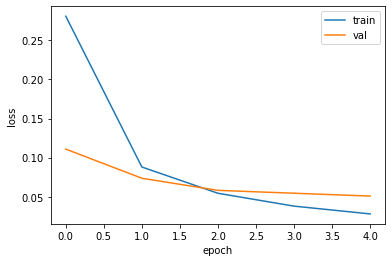

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

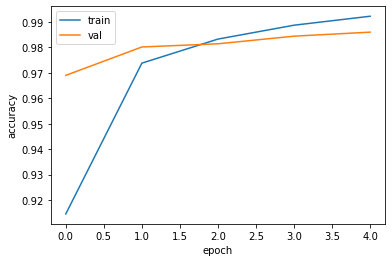

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9871
test_acc: 0.9871000051498413


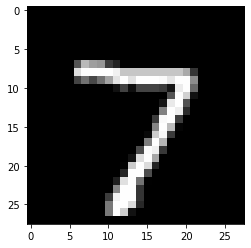

In [22]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [23]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

In [24]:
prediction

array([[0.0000000247, 0.000000044 , 0.0000006655, 0.0000137711,
        0.0000000002, 0.000000005 , 0.          , 0.9999769   ,
        0.0000001135, 0.000008487 ]], dtype=float32)

In [66]:
y_test[0]

7

In [68]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
print(labels[np.argmax(prediction)])

7
